In [40]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import DivergingNorm

from mgwr.gwr import GWR, MGWR #GWR & MGWR constructors
from mgwr.sel_bw import Sel_BW #bandwidth selectio
from mgwr.utils import compare_surfaces, truncate_colormap, shift_colormap

In [42]:
df = gpd.read_file("data/shp/MD_df.shp")
df = df.to_crs("EPSG:4326")
df = df.dropna()
# df = df[(df["PopDen"] > 0.0001) & (df["TotalPop"] > 1000)]

In [43]:
# y1_95p = np.percentile(df["case0630"], 95)
# y2_95p = np.percentile(df["case0831"], 95)

In [44]:
# df1 = df[df["case0630"] < y1_95p].copy()
# df2 = df[df["case0831"] < y2_95p].copy()

df1 = df.copy()
df2 = df.copy()

print(len(df1))
print(len(df2))

1384
1384


In [45]:
cols = ["White", "UnempRt", "Other", "MHI", "Black", "Age0-19"]

X1 = df1[cols].values
y1 = df1["case0630"].values.reshape((-1, 1))

X2 = df2[cols].values
y2 = df2["case0831"].values.reshape((-1, 1))

X1 = (X1 - X1.mean(axis=0)) / X1.std(axis=0)
X2 = (X2 - X2.mean(axis=0)) / X2.std(axis=0)
y1 = (y1 - y1.mean(axis=0)) / y1.std(axis=0)
y2 = (y2 - y2.mean(axis=0)) / y2.std(axis=0)

### 06/30

In [46]:
df1["X"] = df1.apply(lambda row: row.geometry.centroid.coords[0][0], axis=1)
df1["Y"] = df1.apply(lambda row: row.geometry.centroid.coords[0][1], axis=1)

coords1 = list(zip(df1["X"], df1["Y"]))

In [54]:
#Calibrate GWR
gwr_selector1 = Sel_BW(coords1, y1, X1)
gwr_bw1 = gwr_selector1.search()
print(gwr_bw1)
gwr_model1 = GWR(coords1, y1, X1, gwr_bw1)
gwr_results1 = gwr_model1.fit()

114.0


In [48]:
#Add GWR parameters to GeoDataframe
df1['gwr_intercept'] = gwr_results1.params[:,0]
df1['gwr_white'] = gwr_results1.params[:,1]
df1['gwr_unemprt'] = gwr_results1.params[:,2]
df1['gwr_other'] = gwr_results1.params[:,3]
df1['gwr_mhi'] = gwr_results1.params[:,4]
df1['gwr_black'] = gwr_results1.params[:,5]
df1['gwr_age'] = gwr_results1.params[:,6]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t1 = gwr_results1.filter_tvals()

### 08/31

In [53]:
df2["X"] = df2.apply(lambda row: row.geometry.centroid.coords[0][0], axis=1)
df2["Y"] = df2.apply(lambda row: row.geometry.centroid.coords[0][1], axis=1)

coords2 = list(zip(df2["X"], df2["Y"]))

In [55]:
#Calibrate GWR
gwr_selector2 = Sel_BW(coords2, y2, X2)
gwr_bw2 = gwr_selector2.search()
print(gwr_bw2)
gwr_model2 = GWR(coords2, y2, X2, gwr_bw2)
gwr_results2 = gwr_model2.fit()

104.0


In [56]:
#Add GWR parameters to GeoDataframe
df2['gwr_intercept'] = gwr_results2.params[:,0]
df2['gwr_white'] = gwr_results2.params[:,1]
df2['gwr_unemprt'] = gwr_results2.params[:,2]
df2['gwr_other'] = gwr_results2.params[:,3]
df2['gwr_mhi'] = gwr_results2.params[:,4]
df2['gwr_black'] = gwr_results2.params[:,5]
df2['gwr_age'] = gwr_results2.params[:,6]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t2 = gwr_results2.filter_tvals()

### Surfaces of arameters

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


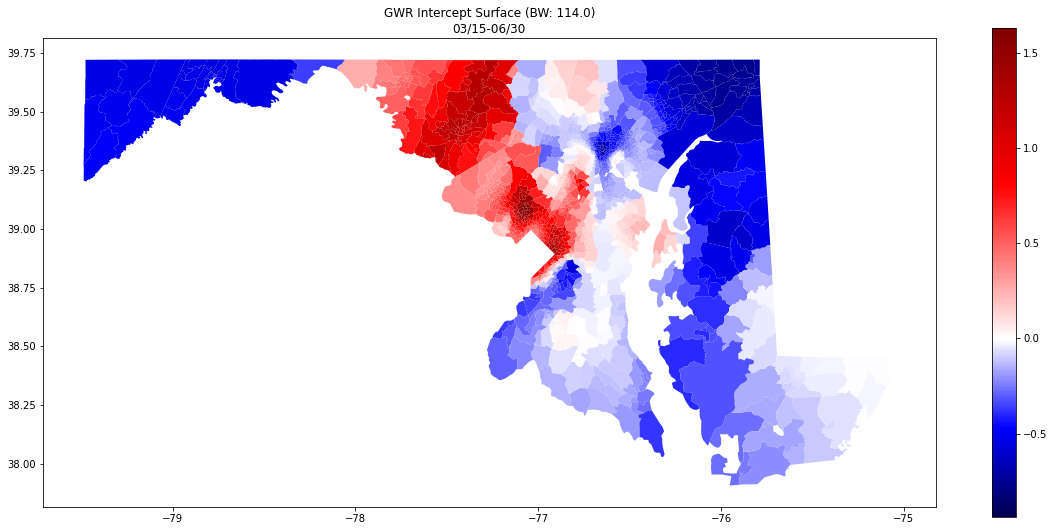

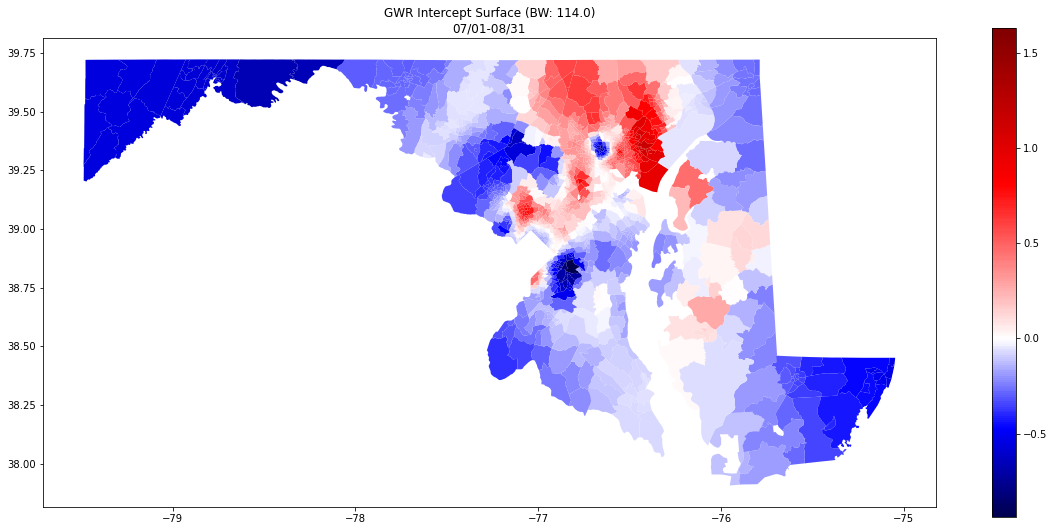

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


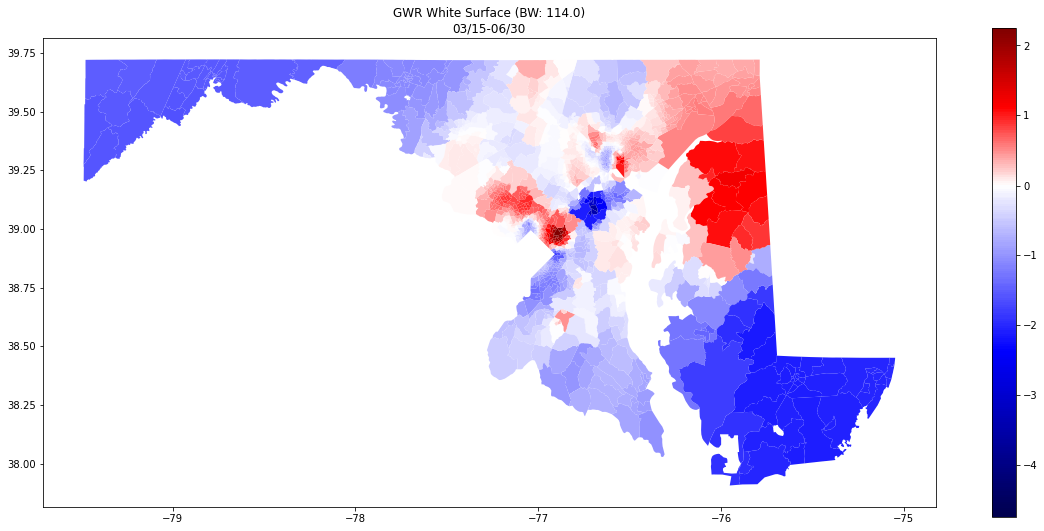

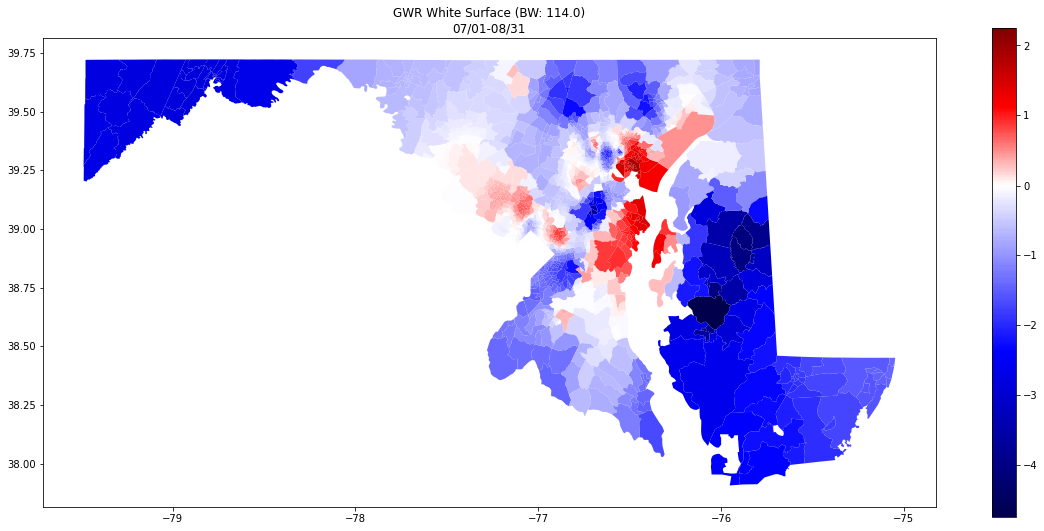

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


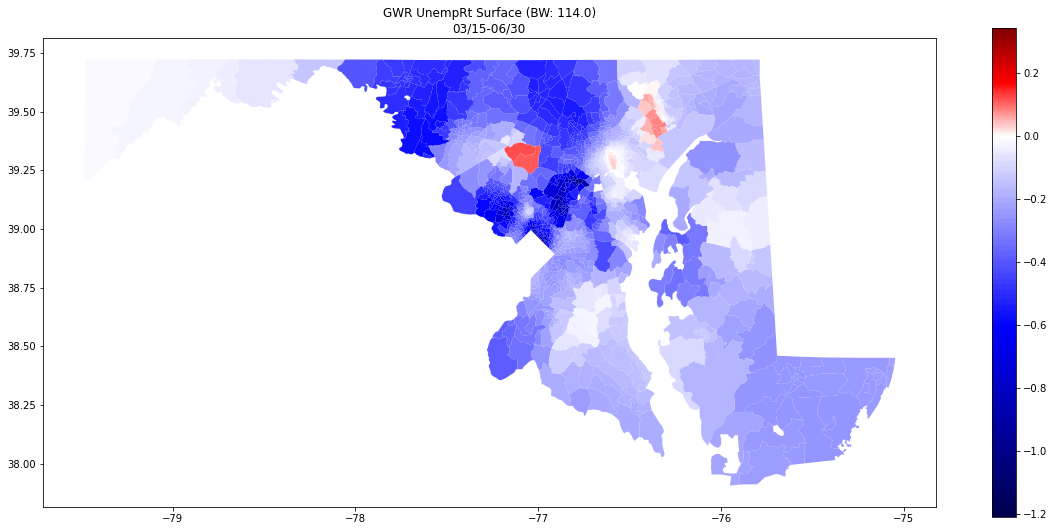

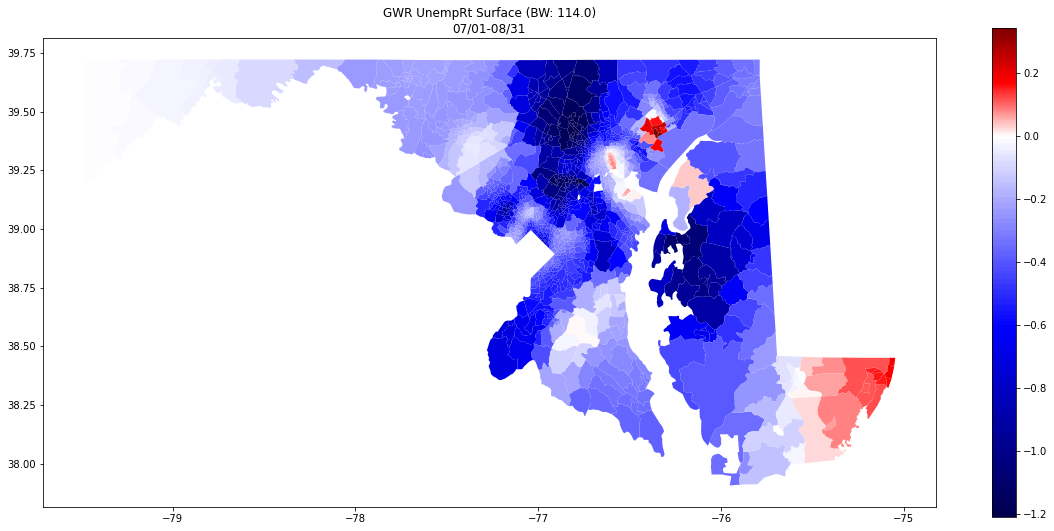

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


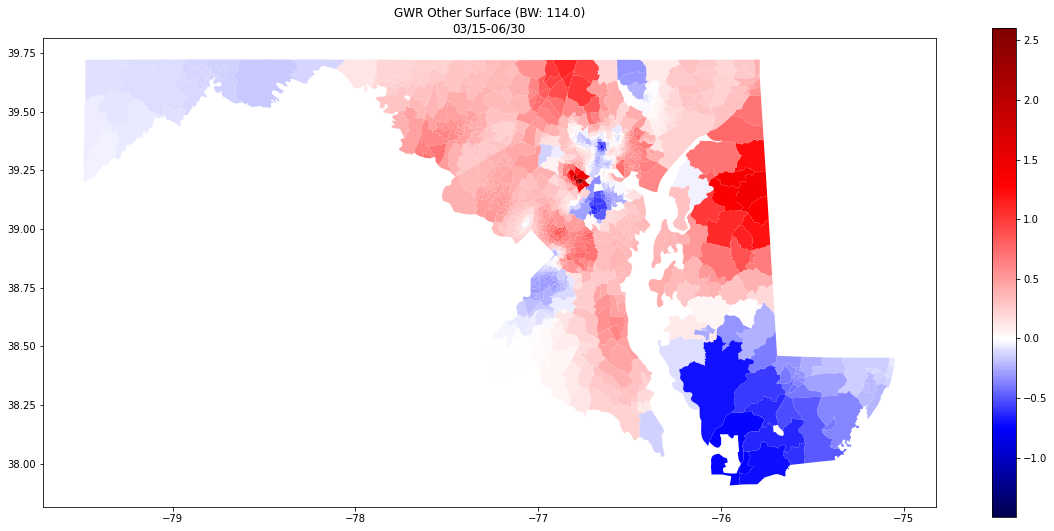

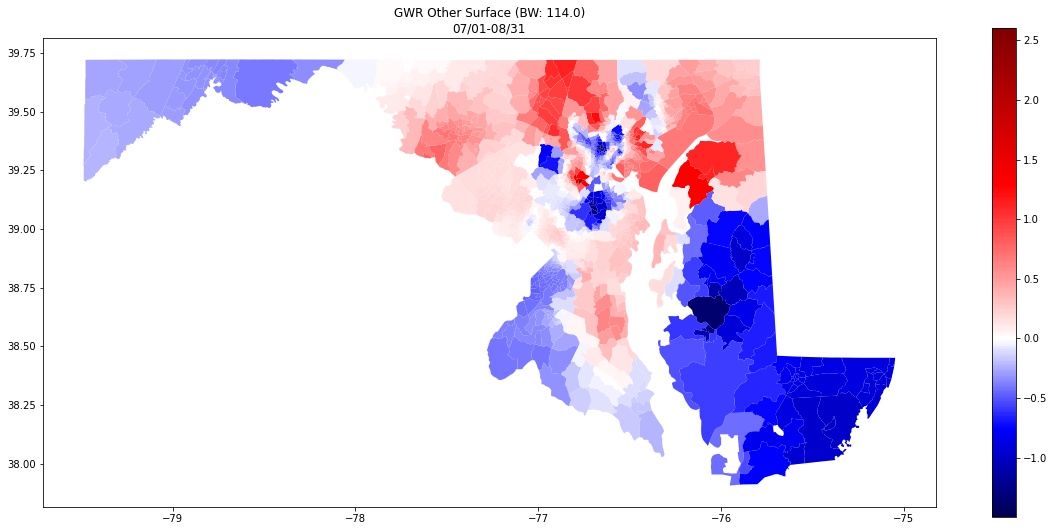

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


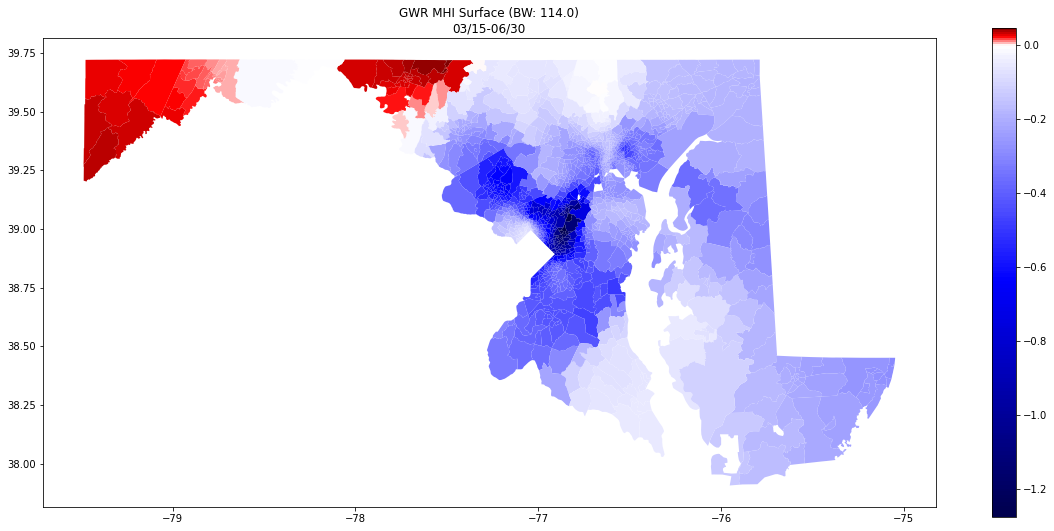

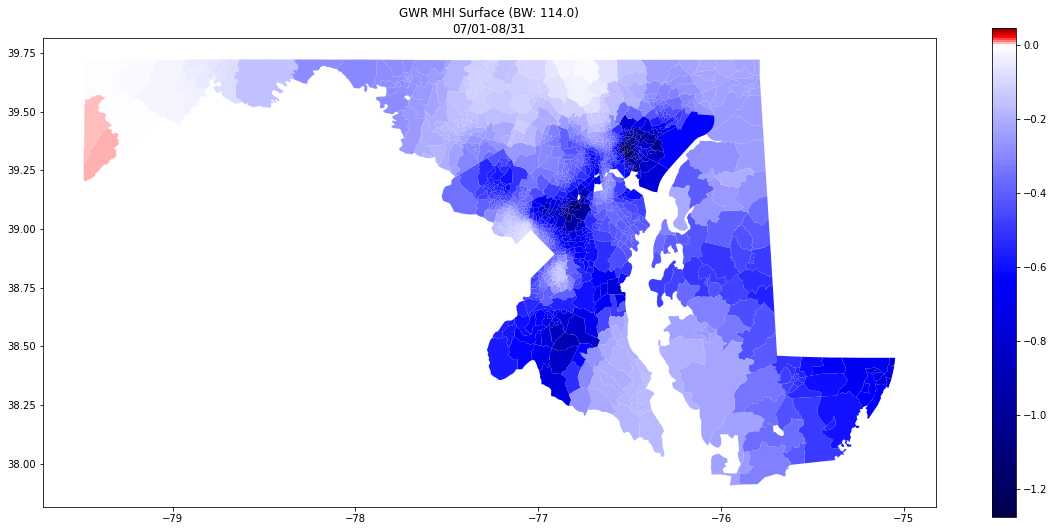

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


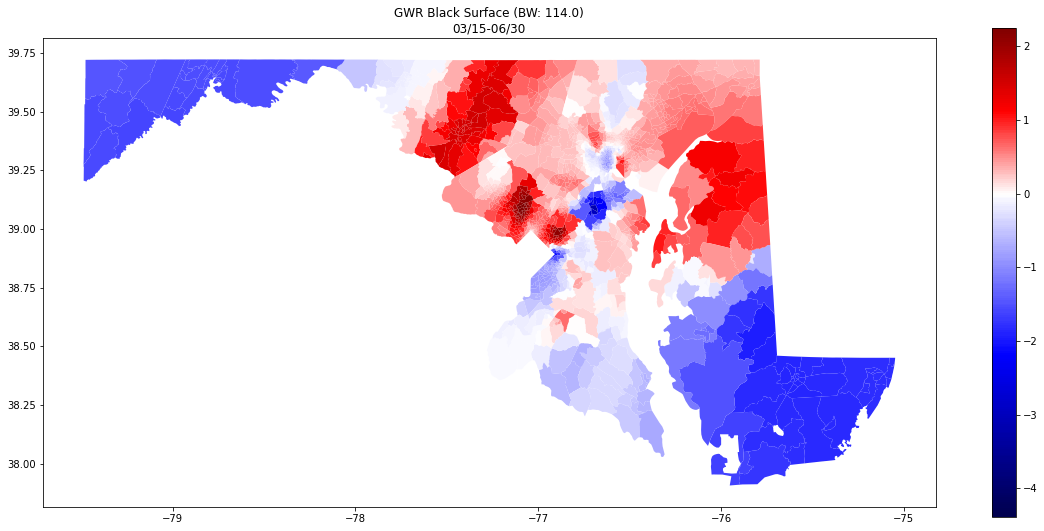

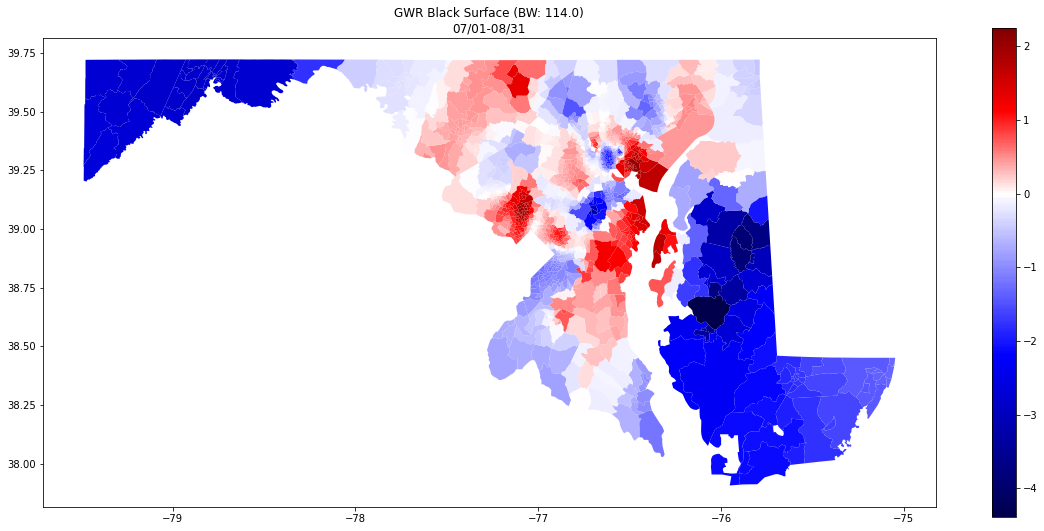

<ipython-input-97-7ed68d446ee8>:7: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)


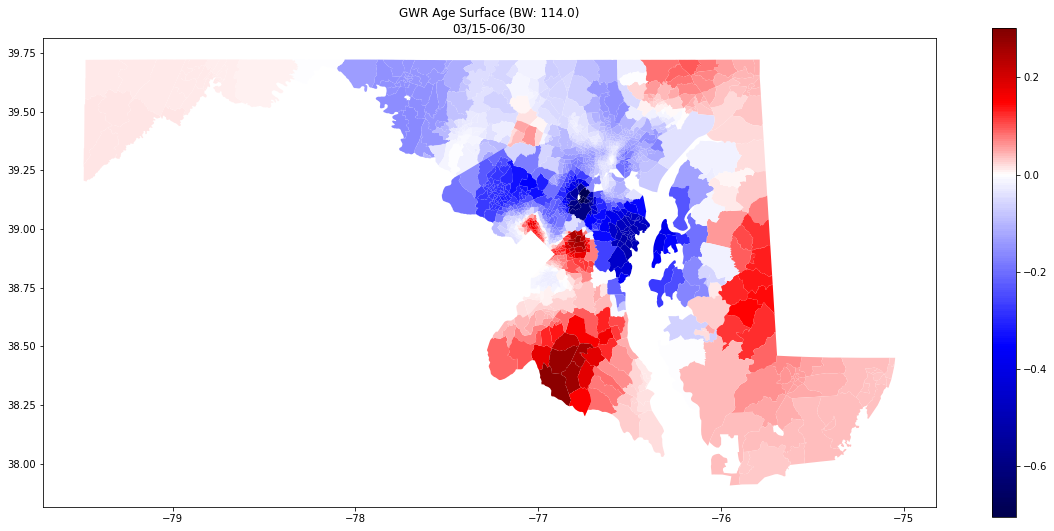

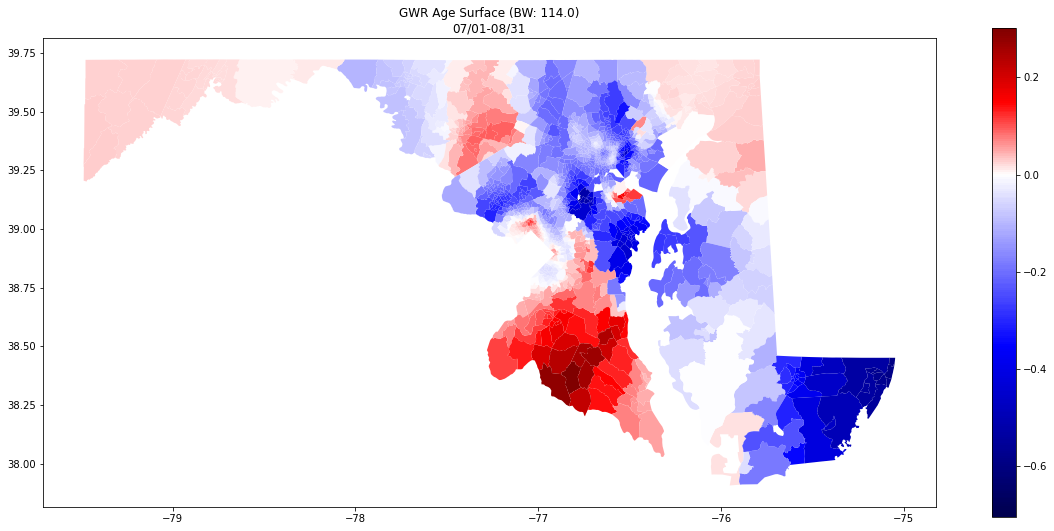

In [97]:
names = ["Intercept", "White", "UnempRt", "Other", "MHI", "Black", "Age"]

for name in names:
    lowername = name.lower()
    VMIN = min(df1["gwr_%s" % lowername].min(), df2["gwr_%s" % lowername].min())
    VMAX = max(df1["gwr_%s" % lowername].max(), df2["gwr_%s" % lowername].max())
    norm = DivergingNorm(vmin=VMIN, vmax=VMAX, vcenter=0)
    
    fig, ax = plt.subplots(figsize=(20, 10))
    df1.plot(column="gwr_%s" % lowername, cmap="seismic", norm=norm, legend=True, legend_kwds={'shrink': 0.9}, ax=ax)
    ax.set_title("GWR %s Surface (BW: %.1f)\n03/15-06/30" % (name, gwr_bw1))
    fig.savefig("figs/GWR/%s_0315_0630.png" % lowername, dpi=220)

    fig, ax = plt.subplots(figsize=(20, 10))
    df2.plot(column="gwr_%s" % lowername, cmap="seismic", norm=norm, legend=True, legend_kwds={'shrink': 0.9}, ax=ax)
    ax.set_title("GWR %s Surface (BW: %.1f)\n07/01-08/31" % (name, gwr_bw1))
    fig.savefig("figs/GWR/%s_0701_0831.png" % lowername, dpi=220)

    plt.show()

### Check model fit

In [105]:
print(gwr_results1.R2)
print(gwr_results2.R2)

0.7323442454400453
0.686980307920743


In [106]:
print(gwr_results1.aic)
print(gwr_results2.aic)

2496.205839975317
2745.8617127237994
